In [1]:
#!pip install -U keras-tuner

In [2]:
#pip install tensorflow

In [3]:
#pip install scikeras

In [4]:
#pip install pandas scikit-learn

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('Alphabets_data.csv') 

In [7]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [9]:
df.describe() 

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [10]:
print(df.isnull().sum())

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64


In [11]:
label_encoder = LabelEncoder()
df['letter'] = label_encoder.fit_transform(df['letter'])

In [12]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,2,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,19,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,18,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [14]:
X = df.drop(columns=['letter'])  # Features
y = df['letter'] 

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
X

array([[-1.0576983 ,  0.29187713, -1.05327668, ..., -0.21908163,
        -1.4381527 ,  0.12291107],
       [ 0.51038497,  1.5023577 , -1.05327668, ..., -0.21908163,
         0.12008142,  1.35944092],
       [-0.01230945,  1.19973756,  0.43590966, ..., -0.8656262 ,
        -0.26947711,  0.74117599],
       ...,
       [ 1.03307939,  0.59449727,  0.43590966, ...,  2.36709667,
        -0.65903564, -2.35014863],
       [-1.0576983 , -1.22122359, -0.55688123, ...,  0.42746295,
         0.50963994,  0.12291107],
       [-0.01230945,  0.59449727,  0.43590966, ..., -0.8656262 ,
        -0.65903564,  0.12291107]])

In [45]:
le = LabelEncoder()
y_encoded = le.fit_transform(df['letter'])
y_encoded = to_categorical(y_encoded, num_classes=26)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [47]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(4000, 16)
(16000, 16)
(4000, 26)
(16000, 26)


In [48]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
pip install --upgrade scikeras

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import classification_report

In [50]:
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))

# Additional hidden layer
model.add(Dense(32, activation='relu'))

# Output layer (26 units for each alphabet class, using softmax for multiclass classification)
model.add(Dense(26, activation='softmax'))


C:\Users\alphabet\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2770 - loss: 2.6219 - val_accuracy: 0.6750 - val_loss: 1.1731
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7127 - loss: 1.0273 - val_accuracy: 0.7659 - val_loss: 0.8442
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7801 - loss: 0.7752 - val_accuracy: 0.7941 - val_loss: 0.7121
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8130 - loss: 0.6529 - val_accuracy: 0.8197 - val_loss: 0.6238
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8359 - loss: 0.5667 - val_accuracy: 0.8409 - val_loss: 0.5547
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8493 - loss: 0.5056 - val_accuracy: 0.8553 - val_loss: 0.5028
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8705 - loss: 0.4497 - val_accuracy: 0.8650 - val_loss: 0.4662
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8799 - loss: 0.4202 - val_accuracy: 0.

In [55]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Generate a classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
print(classification_report(y_true_classes, y_pred_classes))

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9351 - loss: 0.2207
Test Accuracy: 0.9375
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       149
           1       0.92      0.90      0.91       153
           2       0.94      0.91      0.93       137
           3       0.90      0.95      0.92       156
           4       0.93      0.91      0.92       141
           5       0.90      0.94      0.92       140
           6       0.95      0.94      0.94       160
           7       0.84      0.85      0.85       144
           8       0.97      0.92      0.95       146
           9       0.95      0.97      0.96       149
          10       0.89      0.89      0.89       130
          11       0.97      0.94      0.95       155
          12       0.97      0.98      0.97       168
          13       0.96      0.88      0.92       151
          14       0.91      0.95      0.93       1

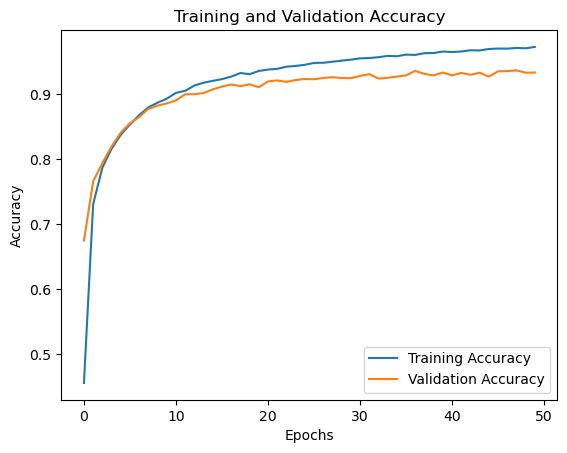

In [58]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [63]:
def create_model(optimizer='adam', neurons=32, activation='relu'): # Include activation as an argument
    model = Sequential()
    # Input layer and hidden layers
    model.add(Dense(neurons, input_shape=(X_train.shape[1],), activation=activation)) # Use activation here
    model.add(Dense(neurons, activation=activation)) # Use activation here
    # Output layer (26 classes for alphabets, softmax for multiclass classification)
    model.add(Dense(26, activation='softmax'))
    # Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Model with KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the Hyperparameter Grid (Remove 'activation' from here)
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [50],
    'optimizer': ['rmsprop'],
    # 'model__neurons': [32, 64, 128], # Pass neurons as 'model__neurons'
    'model__activation': ['relu'] # Pass activation as 'model__activation'
}

# Set Up and Run Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_result = grid.fit(X_train, y_train)

# Display the Best Score and Hyperparameters
print("Best Accuracy: {:.2f} using {}".format(grid_result.best_score_, grid_result.best_params_))

# Train Final Model Using Best Hyperparameters
best_params = grid_result.best_params_

# Rebuild the model with best parameters
final_model = create_model(
    optimizer=best_params['optimizer'],
     # Access neurons with 'model__neurons'
    activation=best_params['model__activation'] # Access activation with 'model__activation'
)

# Train the model with the best hyperparameters
final_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'])

# Evaluate the Model on the Test Data
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
print("Test Accuracy with Best Parameters:", test_accuracy)

# Generate a Classification Report
y_pred = final_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
print(classification_report(y_true_classes, y_pred_classes))

C:\Users\alphabet\AppData\Local\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\alphabet\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\alphabet\AppData\Local\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\alphabet\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_sha

Best Accuracy: 0.91 using {'batch_size': 16, 'epochs': 50, 'model__activation': 'relu', 'optimizer': 'rmsprop'}
Epoch 1/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3265 - loss: 2.3905
Epoch 2/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7157 - loss: 1.0041
Epoch 3/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7747 - loss: 0.7901
Epoch 4/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7997 - loss: 0.6975
Epoch 5/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8228 - loss: 0.6166
Epoch 6/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8301 - loss: 0.5620
Epoch 7/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8476 - loss: 0.5164
Epoch 8/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8585 - loss: 0.4683
Epoch 9/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8591 - loss: 0.4635
Epoch 10/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8729 - loss: 0.4207
Epoch 1

In [64]:
final_model = create_model(
    optimizer=best_params['optimizer'],
     # Access neurons with 'model__neurons'
    activation=best_params['model__activation'] # Access activation with 'model__activation'
)

# Train the model with the best hyperparameters
final_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'])

# Evaluate the Model on the Test Data
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
print("Test Accuracy with Best Parameters:", test_accuracy)

# Generate a Classification Report
y_pred = final_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
print(classification_report(y_true_classes, y_pred_classes))

Epoch 1/50


C:\Users\alphabet\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3491 - loss: 2.3659
Epoch 2/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7044 - loss: 0.9989
Epoch 3/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7661 - loss: 0.8024
Epoch 4/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7949 - loss: 0.6959
Epoch 5/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8210 - loss: 0.6056
Epoch 6/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8392 - loss: 0.5438
Epoch 7/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8506 - loss: 0.5064
Epoch 8/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8570 - loss: 0.4743
Epoch 9/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8632 - loss: 0.4431
Epoch 10/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8740 - loss: 0.4146
Epoch 11/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8726 - loss: 0.4052
Epoch 12/50
1000/1000 ━━━━━━━━━━━━━━━━━━━